# Open Exploration

As we are interested in how dike ring 4 could best balance its economic objectives with a sustainable flood-risk management plan, we would want to first use open exploration to understand how regions in the uncertainty space map to the whole outcome map.

Using open exploration, we will systematically sample the uncertainty or decision space.

## Running the model

Importing all necessary libraries, checking that libraries are up-to-date, and choosing problem formulation.

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [3]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

1.0.3
2.4


In [4]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)
from dike_model_function import DikeNetwork  # @UnresolvedImport


def sum_over(*args):
    return sum(args)

In [5]:
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation


ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3)

In [6]:
#enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
for unc in dike_model.uncertainties:
    print(repr(unc))
    
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
CategoricalParameter('discount rate 3', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132)
RealParameter('A.1_Bmax', 30, 350)
RealParameter('A.1_pfail', 0, 1)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350)
RealParameter('A.2_pfail', 0, 1)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350)
RealParameter('A.3_pfail', 0, 1)
CategoricalParameter('A.3_Brate', [0, 1, 2])
RealParameter('A.4_Bmax', 30, 350)
RealParameter('A.4_pfail', 0, 1)
CategoricalParameter('A.4_Brate', [0, 1, 2])
RealParameter('A.5_Bmax', 30, 350)
RealParameter('A.5_pfail', 0, 1)
CategoricalParameter('A.5_Brate', [0, 1, 2])


In [7]:
#enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))
    
levers = dike_model.levers 

import copy
levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1)
IntegerParameter('0_RfR 1', 0, 1)
IntegerParameter('0_RfR 2', 0, 1)
IntegerParameter('0_RfR 3', 0, 1)
IntegerParameter('1_RfR 0', 0, 1)
IntegerParameter('1_RfR 1', 0, 1)
IntegerParameter('1_RfR 2', 0, 1)
IntegerParameter('1_RfR 3', 0, 1)
IntegerParameter('2_RfR 0', 0, 1)
IntegerParameter('2_RfR 1', 0, 1)
IntegerParameter('2_RfR 2', 0, 1)
IntegerParameter('2_RfR 3', 0, 1)
IntegerParameter('3_RfR 0', 0, 1)
IntegerParameter('3_RfR 1', 0, 1)
IntegerParameter('3_RfR 2', 0, 1)
IntegerParameter('3_RfR 3', 0, 1)
IntegerParameter('4_RfR 0', 0, 1)
IntegerParameter('4_RfR 1', 0, 1)
IntegerParameter('4_RfR 2', 0, 1)
IntegerParameter('4_RfR 3', 0, 1)
IntegerParameter('EWS_DaysToThreat', 0, 4)
IntegerParameter('A.1_DikeIncrease 0', 0, 10)
IntegerParameter('A.1_DikeIncrease 1', 0, 10)
IntegerParameter('A.1_DikeIncrease 2', 0, 10)
IntegerParameter('A.1_DikeIncrease 3', 0, 10)
IntegerParameter('A.2_DikeIncrease 0', 0, 10)
IntegerParameter('A.2_DikeIncrease 1', 0, 10)
I

In [8]:
#enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1 Total Costs', variable_name=['A.1_Expected Annual Damage 0', 'A.1_Expected Annual Damage 1', 'A.1_Expected Annual Damage 2', 'A.1_Expected Annual Damage 3', 'A.1_Dike Investment Costs 0', 'A.1_Dike Investment Costs 1', 'A.1_Dike Investment Costs 2', 'A.1_Dike Investment Costs 3'], function=<function sum_over at 0x000002E7622FEF28>)
ScalarOutcome('A.1_Expected Number of Deaths', variable_name=['A.1_Expected Number of Deaths 0', 'A.1_Expected Number of Deaths 1', 'A.1_Expected Number of Deaths 2', 'A.1_Expected Number of Deaths 3'], function=<function sum_over at 0x000002E7622FEF28>)
ScalarOutcome('A.2 Total Costs', variable_name=['A.2_Expected Annual Damage 0', 'A.2_Expected Annual Damage 1', 'A.2_Expected Annual Damage 2', 'A.2_Expected Annual Damage 3', 'A.2_Dike Investment Costs 0', 'A.2_Dike Investment Costs 1', 'A.2_Dike Investment Costs 2', 'A.2_Dike Investment Costs 3'], function=<function sum_over at 0x000002E7622FEF28>)
ScalarOutcome('A.2_Expected Number of D

## Visual Analysis for base case scenario

In [9]:
from ema_workbench import Policy, perform_experiments
from ema_workbench import ema_logging

ema_logging.log_to_stderr(ema_logging.INFO)

policy = Policy("base case", **{l.name:0 for l in dike_model.levers})
n_scenarios = 1000
results = perform_experiments(dike_model, n_scenarios, policy)

[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished


In [19]:
experiments, outcomes = results



In [13]:
#drop outcomes that are not of interest 
outcomes_of_interest = ['A.4 Total Costs','A.4_Expected Number of Deaths','RfR Total Costs','Expected Evacuation Costs']

In [16]:
import pandas as pd
outcomes_new1= {k:v.tolist() for k, v in outcomes.items()}
outcome_df1 = pd.DataFrame.from_dict(outcomes_new1)
outcome_df1 = outcome_df1[outcomes_of_interest]
outcome_df1.head()

,A.4 Total Costs,A.4_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,2.157419e+07,0.016906,0.0,0.0
1,7.749724e+07,0.050654,0.0,0.0
2,0.000000e+00,0.000000,0.0,0.0
3,0.000000e+00,0.000000,0.0,0.0
4,0.000000e+00,0.000000,0.0,0.0


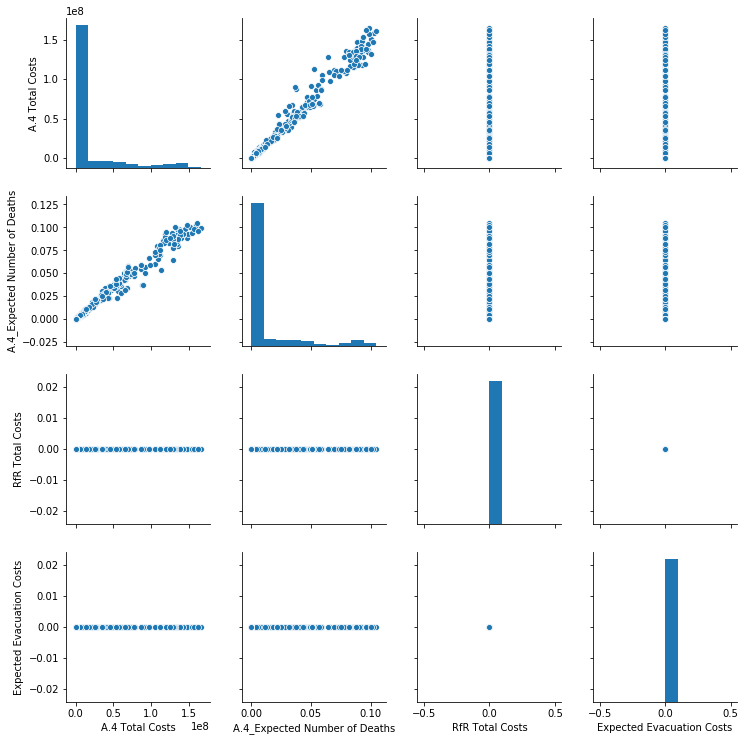

In [17]:
sns.pairplot(pd.DataFrame.from_dict(outcome_df1))
plt.show()

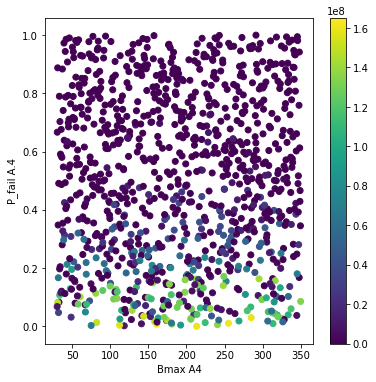

In [18]:
Total_cost = outcome_df1['A.4 Total Costs']
fig, ax = plt.subplots(figsize=(6,6))

sc = ax.scatter(experiments['A.4_Bmax'], experiments['A.4_pfail'], c=Total_cost )
plt.colorbar(sc)
ax.set_xlabel('Bmax A4')
ax.set_ylabel('P_fail A.4')
plt.show()

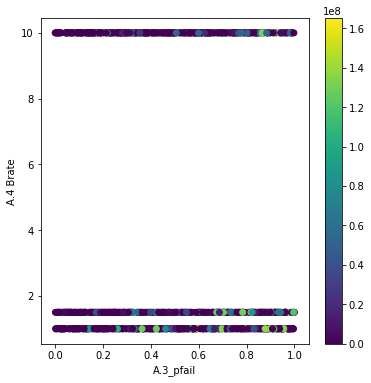

In [20]:
fig, ax = plt.subplots(figsize=(6,6))
sc = ax.scatter(experiments['A.3_pfail'], experiments['A.4_Brate'], c=Total_cost )
plt.colorbar(sc)
ax.set_xlabel('A.3_pfail')
ax.set_ylabel('A.4 Brate')
plt.show()

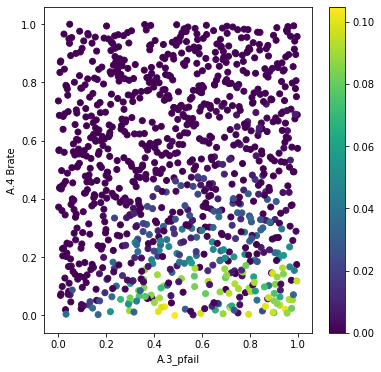

In [21]:
Deaths = outcome_df1['A.4_Expected Number of Deaths']
fig, ax = plt.subplots(figsize=(6,6))

sc = ax.scatter(experiments['A.3_pfail'], experiments['A.4_pfail'], c=Deaths )
plt.colorbar(sc)
ax.set_xlabel('A.3_pfail')
ax.set_ylabel('A.4 Brate')
plt.show()

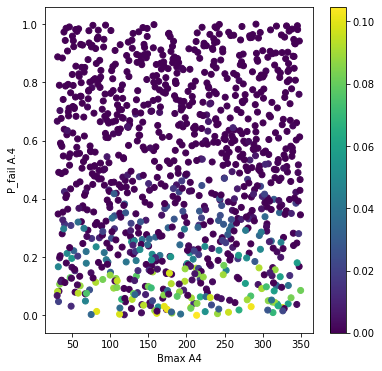

In [22]:
fig, ax = plt.subplots(figsize=(6,6))

sc = ax.scatter(experiments['A.4_Bmax'], experiments['A.4_pfail'], c=Deaths )
plt.colorbar(sc)
ax.set_xlabel('Bmax A4')
ax.set_ylabel('P_fail A.4')
plt.show()

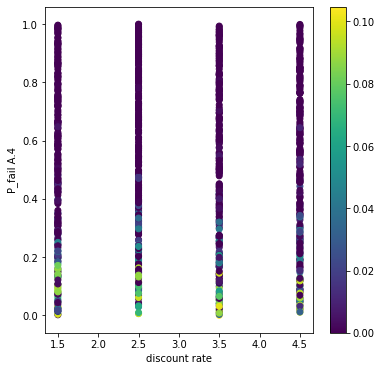

In [24]:
fig, ax = plt.subplots(figsize=(6,6))

sc = ax.scatter(experiments['discount rate 2'], experiments['A.4_pfail'], c=Deaths )
plt.colorbar(sc)
ax.set_xlabel('discount rate')
ax.set_ylabel('P_fail A.4')
plt.show()

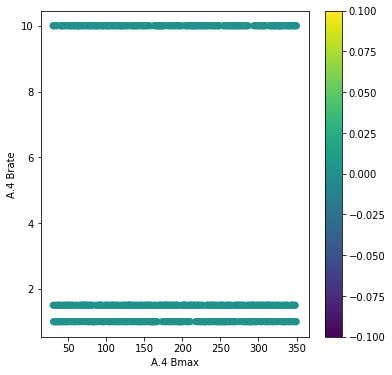

In [26]:
Room_for_River = outcome_df1['RfR Total Costs']
fig, ax = plt.subplots(figsize=(6,6))

sc = ax.scatter(experiments['A.4_Bmax'], experiments['A.4_Brate'], c=Room_for_River )
plt.colorbar(sc)
ax.set_xlabel('A.4 Bmax')
ax.set_ylabel('A.4 Brate')
plt.show()

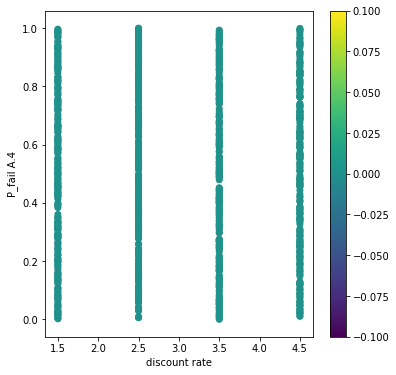

In [28]:
fig, ax = plt.subplots(figsize=(6,6))

sc = ax.scatter(experiments['discount rate 2'], experiments['A.4_pfail'], c=Room_for_River )
plt.colorbar(sc)
ax.set_xlabel('discount rate')
ax.set_ylabel('P_fail A.4')
plt.show()

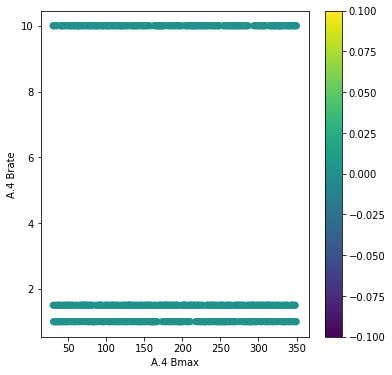

In [29]:
EEC = outcome_df1['Expected Evacuation Costs']
fig, ax = plt.subplots(figsize=(6,6))

sc = ax.scatter(experiments['A.4_Bmax'], experiments['A.4_Brate'], c=EEC )
plt.colorbar(sc)
ax.set_xlabel('A.4 Bmax')
ax.set_ylabel('A.4 Brate')
plt.show()

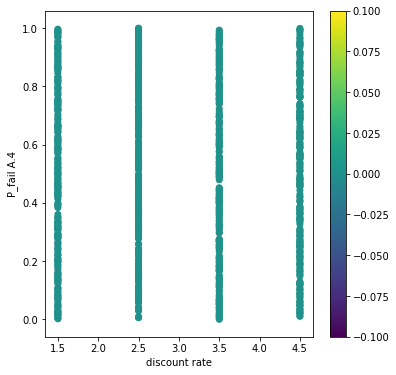

In [30]:
fig, ax = plt.subplots(figsize=(6,6))

sc = ax.scatter(experiments['discount rate 2'], experiments['A.4_pfail'], c=Room_for_River )
plt.colorbar(sc)
ax.set_xlabel('discount rate')
ax.set_ylabel('P_fail A.4')
plt.show()

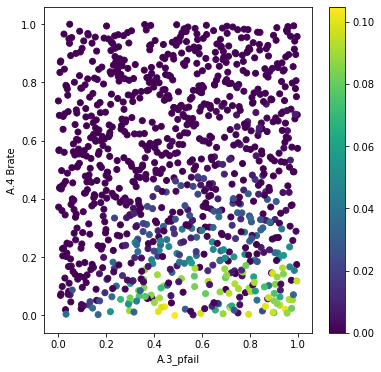

In [31]:
Deaths = outcome_df1['A.4_Expected Number of Deaths']
fig, ax = plt.subplots(figsize=(6,6))

sc = ax.scatter(experiments['A.3_pfail'], experiments['A.4_pfail'], c=Deaths )
plt.colorbar(sc)
ax.set_xlabel('A.3_pfail')
ax.set_ylabel('A.4 Brate')
plt.show()

The following important points were identified:
 - a low probability to fail increases the total costs
 - over all values of Bmax the outcomes of costs and deaths can be high or low. Bmax does not seem to have a high influence compared to other uncertainties
 - The chance of deaths increases with a low p4_fail and a high p3_fail. If both are high, the change of death is low. B3_fail seems to have a higher influence than b4_fail
 - Room for the River costs do not change depending on the uncertainties
 - With a higher probability of a dike breach at dike 3, the evacuation costs can increase

## Feature Scoring

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


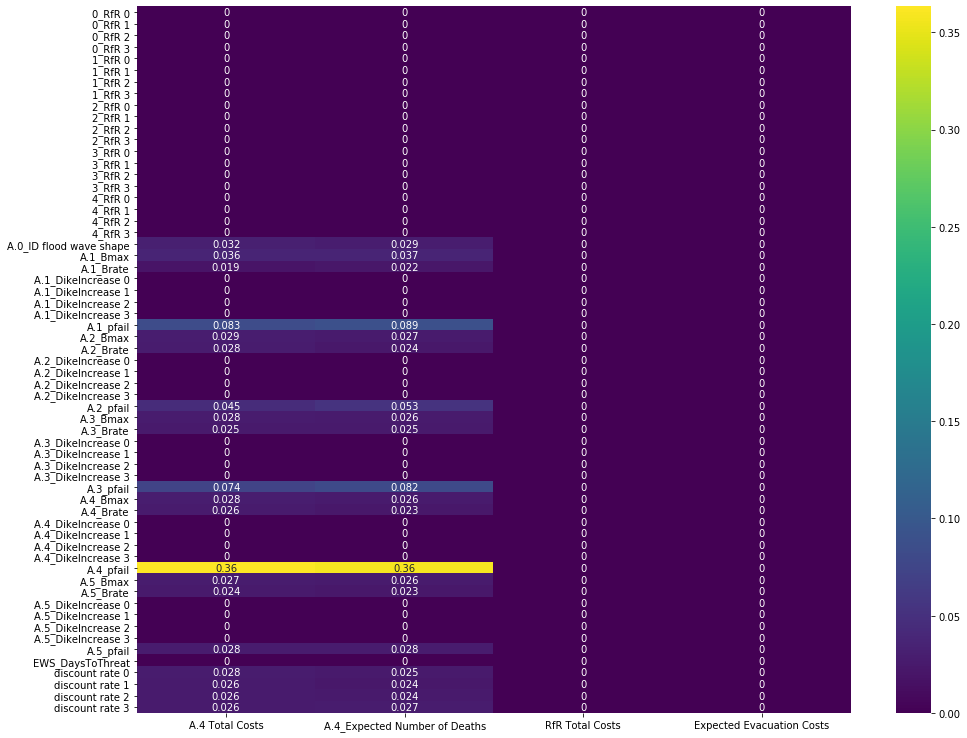

In [33]:
from ema_workbench.analysis import feature_scoring

x = experiments
y = outcome_df1

fs = feature_scoring.get_feature_scores_all(x, y)


plt.figure(figsize = (16,13))
sns.heatmap(fs, cmap='viridis', annot=True, )
plt.show()

The feature scoring maps indicates that the total costs and the expected number of deaths are the most influenced by a dike breach at dike 4, then by a dike breach at dike 1, and then by a dike breach at dike 3. 

## Visual Analysis for random policies

In [46]:
#running the model through EMA workbench
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)
 
with MultiprocessingEvaluator(dike_model) as evaluator:
    experiments,outcomes = evaluator.perform_experiments(scenarios=100, policies=20)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 100 scenarios * 20 policies * 1 model(s) = 2000 experiments
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] 1200 cases completed
[MainProcess/INFO] 1400 cases completed
[MainProcess/INFO] 1600 cases completed
[MainProcess/INFO] 1800 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [47]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 2,A.4_DikeIncrease 3,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,A.5_DikeIncrease 3,EWS_DaysToThreat,scenario,policy,model
0,124.0,236.519425,1,0.536575,111.501723,10,0.402683,120.153391,1.5,0.936593,...,1.0,9.0,5.0,3.0,8.0,10.0,0.0,100,8,dikesnet
1,126.0,125.032438,1,0.212007,105.015654,1.5,0.628876,213.282925,10,0.033553,...,1.0,9.0,5.0,3.0,8.0,10.0,0.0,101,8,dikesnet
2,54.0,238.774961,1.5,0.136835,346.625453,10,0.766017,331.798136,1.5,0.299022,...,1.0,9.0,5.0,3.0,8.0,10.0,0.0,102,8,dikesnet
3,97.0,90.557590,1.5,0.767559,321.776248,1,0.476975,263.780365,1,0.321158,...,1.0,9.0,5.0,3.0,8.0,10.0,0.0,103,8,dikesnet
4,16.0,314.936754,10,0.276239,123.628664,1,0.872274,280.680938,1,0.780331,...,1.0,9.0,5.0,3.0,8.0,10.0,0.0,104,8,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,12.0,103.686966,1.5,0.098310,232.017555,1,0.586738,219.070105,10,0.109538,...,9.0,0.0,0.0,9.0,7.0,2.0,2.0,195,27,dikesnet
1996,101.0,193.386404,10,0.381197,32.116969,1.5,0.693914,61.094051,10,0.530118,...,9.0,0.0,0.0,9.0,7.0,2.0,2.0,196,27,dikesnet
1997,0.0,319.090515,10,0.155041,217.590684,10,0.365978,322.383943,10,0.584295,...,9.0,0.0,0.0,9.0,7.0,2.0,2.0,197,27,dikesnet
1998,22.0,292.075789,1,0.405219,249.374905,10,0.150108,79.166139,1,0.381861,...,9.0,0.0,0.0,9.0,7.0,2.0,2.0,198,27,dikesnet


In [48]:
outcomes

{'A.1 Total Costs': array([2.86006894e+08, 2.86006894e+08, 2.86006894e+08, ...,
        2.72466613e+08, 2.72466613e+08, 2.72466613e+08]),
 'A.1_Expected Number of Deaths': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.2 Total Costs': array([2.08154368e+08, 2.06845132e+08, 2.04285696e+08, ...,
        1.59442877e+08, 1.59442877e+08, 1.59442877e+08]),
 'A.2_Expected Number of Deaths': array([0.00579615, 0.00352501, 0.00048482, ..., 0.        , 0.        ,
        0.        ]),
 'A.3 Total Costs': array([1.48305595e+08, 1.48305595e+08, 1.48305595e+08, ...,
        1.40329773e+08, 1.40987188e+08, 1.43142872e+08]),
 'A.3_Expected Number of Deaths': array([0.        , 0.        , 0.        , ..., 0.        , 0.00026631,
        0.0011289 ]),
 'A.4 Total Costs': array([53053083.78592442, 51073778.74583754, 52411621.19360079, ...,
        36198674.08227548, 36198674.08227548, 36198674.08227548]),
 'A.4_Expected Number of Deaths': array([0.00124698, 0.        , 0.00100587, ..., 0.        , 0.      

In [49]:
import pandas as pd
outcomes_new= {k:v.tolist() for k, v in outcomes.items()}

In [50]:
outcomes_new

{'A.1 Total Costs': [286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.7045493,
  286006893.704

In [51]:
outcome_df = pd.DataFrame.from_dict(outcomes_new)
outcome_df.head()

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,2.860069e+08,0.0,2.081544e+08,0.005796,1.483056e+08,0.0,5.305308e+07,0.001247,2.355824e+08,0.0,1.645300e+09,0.0
1,2.860069e+08,0.0,2.068451e+08,0.003525,1.483056e+08,0.0,5.107378e+07,0.000000,2.355824e+08,0.0,1.645300e+09,0.0
2,2.860069e+08,0.0,2.042857e+08,0.000485,1.483056e+08,0.0,5.241162e+07,0.001006,2.355824e+08,0.0,1.645300e+09,0.0
3,2.860069e+08,0.0,2.076533e+08,0.005810,1.483056e+08,0.0,5.107378e+07,0.000000,2.355824e+08,0.0,1.645300e+09,0.0
4,2.860069e+08,0.0,2.039861e+08,0.000000,1.483056e+08,0.0,5.107378e+07,0.000000,2.355824e+08,0.0,1.645300e+09,0.0


In [53]:
outcome_df = outcome_df[outcomes_of_interest]
outcome_df.head()

,A.4 Total Costs,A.4_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,5.305308e+07,0.001247,1.645300e+09,0.0
1,5.107378e+07,0.000000,1.645300e+09,0.0
2,5.241162e+07,0.001006,1.645300e+09,0.0
3,5.107378e+07,0.000000,1.645300e+09,0.0
4,5.107378e+07,0.000000,1.645300e+09,0.0


In [55]:
#Code needed for disaggregate view

#outcome_df['A.4_Expected Annual Damage Total'] = outcome_df['A.4_Expected Annual Damage 0'] +outcome_df['A.4_Expected Annual Damage 1'] +outcome_df['A.4_Expected Annual Damage 2'] +outcome_df['A.4_Expected Annual Damage 3']
#outcome_df['A.4_Dike Investment Costs Total'] = outcome_df['A.4_Dike Investment Costs 0']+ outcome_df['A.4_Dike Investment Costs 1']+outcome_df['A.4_Dike Investment Costs 2']+outcome_df['A.4_Dike Investment Costs 3']
#outcome_df['A.4_Expected Number of Deaths Total'] = outcome_df['A.4_Expected Number of Deaths 0'] + outcome_df['A.4_Expected Number of Deaths 1']+outcome_df['A.4_Expected Number of Deaths 2'] +outcome_df['A.4_Expected Number of Deaths 3']

In [56]:
#total_outcomes = outcome_df[['A.4_Expected Annual Damage Total','A.4_Dike Investment Costs Total','A.4_Expected Number of Deaths Total']]

To find out how the outcomes relate to each other, we will create a pair plot with all the total outcomes.

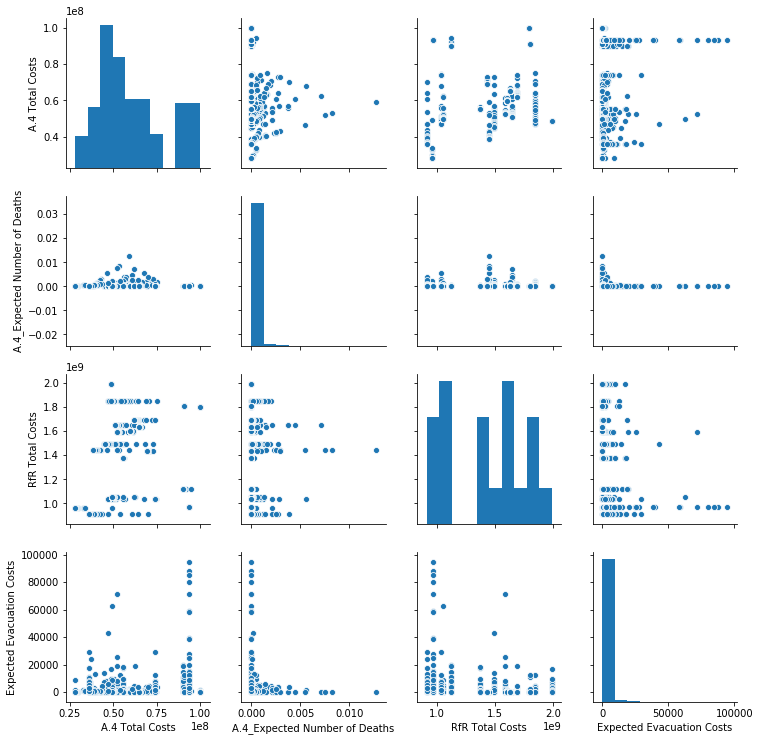

In [57]:
sns.pairplot(outcome_df)

Since we 

[MainProcess/INFO] no time dimension found in results


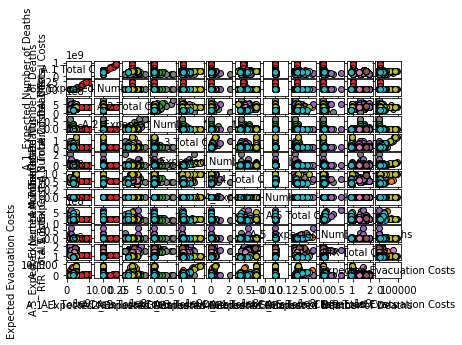

In [65]:
# Does not provide any insight

from ema_workbench.analysis import pairs_plotting

fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, group_by='policy',
                                         legend=False)
plt.show()

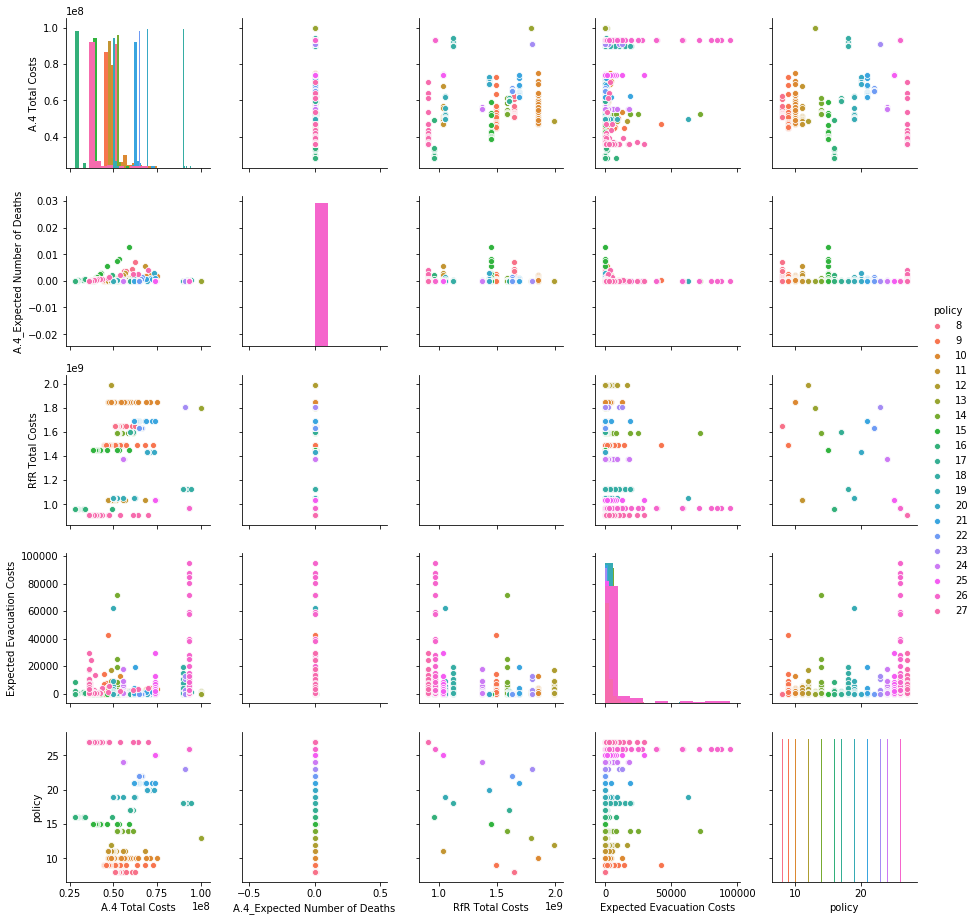

In [69]:
#policies = experiments['policy']

#outcome_df['policy'] = policies

sns.pairplot(outcome_df, hue='policy', vars=outcome_df.keys(), diag_kind='hist')
plt.show()

The pairplot gives the following insights:
 - Low room for the river costs and lead to higher and and a higher uncertainty in the expected evacuation costs
 - The lower the the expectad evacuation costs the higher is the change for deaths
 - Total costs are higher if the expected evacuation cost increases
 - The expected number of deaths vs. total costs scatter plot does not give provide a clear relationship between the two factors. But more expensive policies provide a higher protection against deaths. The highest uncertainty exist for policy with a mid-range price.

## Feature scoring to find out which outcomes are influenced by which policies and uncertainties

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


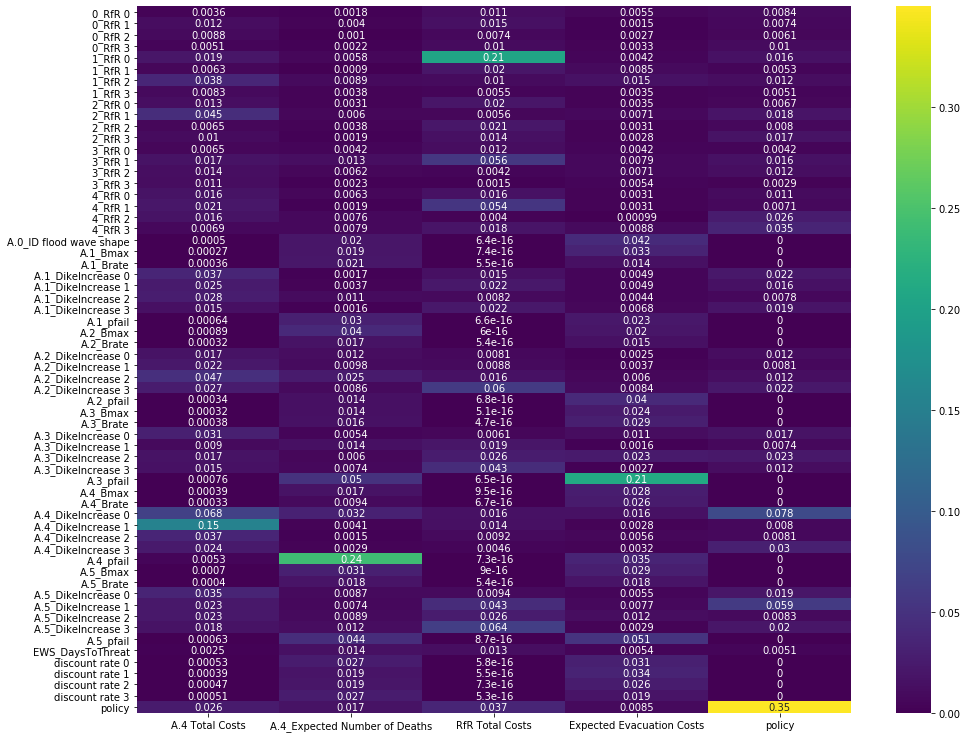

In [96]:
from ema_workbench.analysis import feature_scoring

x = experiments
y = outcome_df

fs = feature_scoring.get_feature_scores_all(x, y)


plt.figure(figsize = (16,13))
sns.heatmap(fs, cmap='viridis', annot=True, )
plt.show()

The feature scoring plot shows the the total costs are primarly influenced by a dike increase in the second planning step. Not surprisingly, the expected number of deaths is influenced by the probability of the dikes at dike ring 4 to fail. The RfR total costs are influenced by the realization of this policy, and the expected evacuation costs are influenced the highest by the probability of a dike breach at dike ring 3 and not dike ring 4.

## What effect do the uncertainties have on the outcomes?

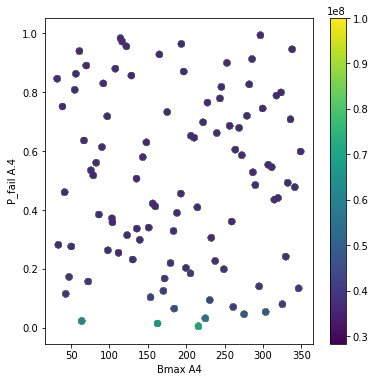

In [89]:
Total_cost = outcome_df['A.4 Total Costs']
fig, ax = plt.subplots(figsize=(6,6))

sc = ax.scatter(experiments['A.4_Bmax'], experiments['A.4_pfail'], c=Total_cost )
plt.colorbar(sc)
ax.set_xlabel('Bmax A4')
ax.set_ylabel('P_fail A.4')
plt.show()

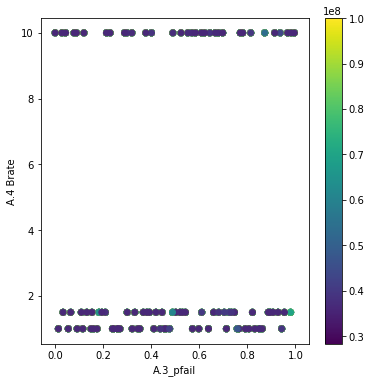

In [97]:
fig, ax = plt.subplots(figsize=(6,6))
sc = ax.scatter(experiments['A.3_pfail'], experiments['A.4_Brate'], c=Total_cost )
plt.colorbar(sc)
ax.set_xlabel('A.3_pfail')
ax.set_ylabel('A.4 Brate')
plt.show()

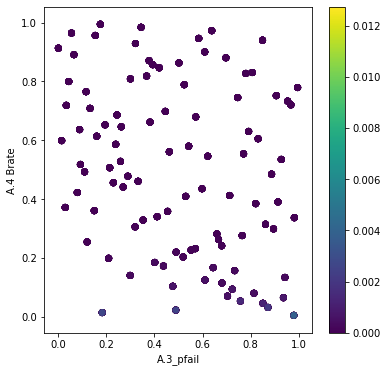

In [99]:
Deaths = outcome_df['A.4_Expected Number of Deaths']
fig, ax = plt.subplots(figsize=(6,6))

sc = ax.scatter(experiments['A.3_pfail'], experiments['A.4_pfail'], c=Deaths )
plt.colorbar(sc)
ax.set_xlabel('A.3_pfail')
ax.set_ylabel('A.4 Brate')
plt.show()

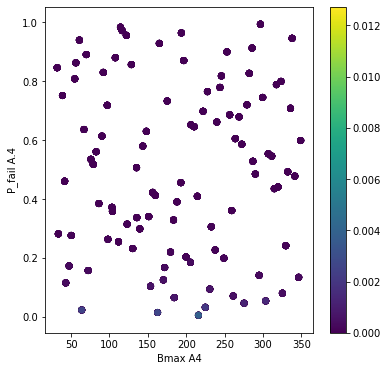

In [100]:
fig, ax = plt.subplots(figsize=(6,6))

sc = ax.scatter(experiments['A.4_Bmax'], experiments['A.4_pfail'], c=Deaths )
plt.colorbar(sc)
ax.set_xlabel('Bmax A4')
ax.set_ylabel('P_fail A.4')
plt.show()

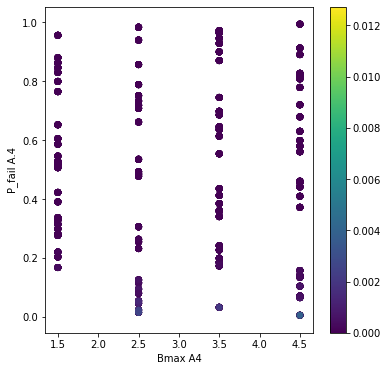

In [103]:
fig, ax = plt.subplots(figsize=(6,6))

sc = ax.scatter(experiments['discount rate 2'], experiments['A.4_pfail'], c=Deaths )
plt.colorbar(sc)
ax.set_xlabel('Bmax A4')
ax.set_ylabel('P_fail A.4')
plt.show()

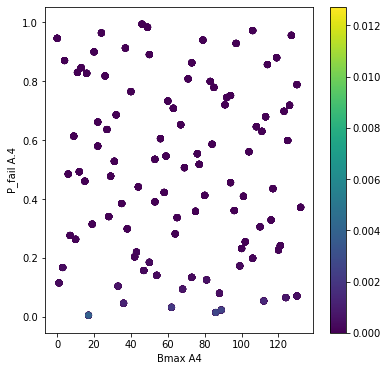

In [106]:

fig, ax = plt.subplots(figsize=(6,6))

sc = ax.scatter(experiments['A.0_ID flood wave shape'], experiments['A.4_pfail'], c=Deaths )
plt.colorbar(sc)
ax.set_xlabel('Bmax A4')
ax.set_ylabel('P_fail A.4')
plt.show()

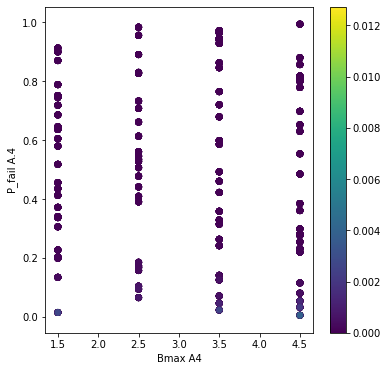

In [105]:

fig, ax = plt.subplots(figsize=(6,6))

sc = ax.scatter(experiments['discount rate 0'], experiments['A.4_pfail'], c=Deaths )
plt.colorbar(sc)
ax.set_xlabel('Bmax A4')
ax.set_ylabel('P_fail A.4')
plt.show()

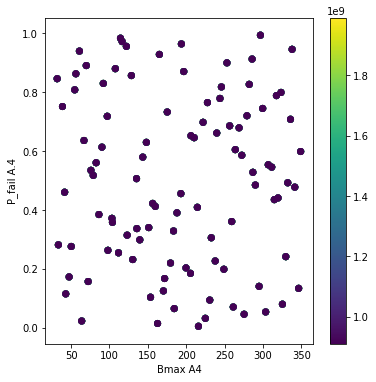

In [107]:
RfR_costs = outcome_df['RfR Total Costs']

fig, ax = plt.subplots(figsize=(6,6))

sc = ax.scatter(experiments['A.4_Bmax'], experiments['A.4_pfail'], c=RfR_costs )
plt.colorbar(sc)
ax.set_xlabel('Bmax A4')
ax.set_ylabel('P_fail A.4')
plt.show()